In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [83]:
pd.set_option('display.max_columns',80)

In [84]:
df=pd.read_csv("Data.csv")

In [85]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


# Data cleaning

#### changing all the columns to lower case

In [86]:
df1=df.copy()

In [87]:
df1.columns=[x.lower() for x in df1.columns]
df1.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalstatus,has_children,education,occupation,income,car,bar,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,direction_opp,accept(y/n?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0


### Dropping the unwanted columns

In [88]:
# As driving time and direction are given dropping destination col
# As weather column is given dropping the temp column
# direction_opp and direction_same giving the same info so dropping direction_opp column

df1=df1.drop(columns=['destination','temperature','direction_opp'])

### Handling Missing Values

In [89]:
# checking for percentage of missing data

df1.isnull().sum()/len(df1)*100

passanger                0.000000
weather                  0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalstatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
bar                      0.843582
coffeehouse              1.710817
carryaway                1.190476
restaurantlessthan20     1.024913
restaurant20to50         1.490066
tocoupon_geq5min         0.000000
tocoupon_geq15min        0.000000
tocoupon_geq25min        0.000000
direction_same           0.000000
accept(y/n?)             0.000000
dtype: float64

In [1]:
a="this is python"
s=a.split(" ")
s1=s[::-1]
s2=" ".join(s1)
s2
    

'python is this'

In [90]:
# in car column we have 99% of missing data so we drop that column

df1=df1.drop(columns=['car'])

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   passanger             12684 non-null  object
 1   weather               12684 non-null  object
 2   coupon                12684 non-null  object
 3   expiration            12684 non-null  object
 4   gender                12684 non-null  object
 5   age                   12684 non-null  object
 6   maritalstatus         12684 non-null  object
 7   has_children          12684 non-null  int64 
 8   education             12684 non-null  object
 9   occupation            12684 non-null  object
 10  income                12684 non-null  object
 11  bar                   12577 non-null  object
 12  coffeehouse           12467 non-null  object
 13  carryaway             12533 non-null  object
 14  restaurantlessthan20  12554 non-null  object
 15  restaurant20to50      12495 non-null

In [92]:
# Filling the missing data
# Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50 --object datatype---filling with mode
df1['bar']=df1['bar'].fillna(df1['bar'].mode()[0])
df1['coffeehouse']=df1['coffeehouse'].fillna(df1['coffeehouse'].mode()[0])
df1['carryaway']=df1['carryaway'].fillna(df1['carryaway'].mode()[0])
df1['restaurantlessthan20']=df1['restaurantlessthan20'].fillna(df1['restaurantlessthan20'].mode()[0])
df1['restaurant20to50']=df1['restaurant20to50'].fillna(df1['restaurant20to50'].mode()[0])

In [93]:
df1.isnull().sum().sum()                                        # no missing values found

0

### Handling duplicates

In [94]:
df1.duplicated().sum()                  # duplicated rows

1034

In [95]:
# Dropping the duplicated rows

df1=df1.drop_duplicates(keep='first')

In [96]:
df1.duplicated().sum()

0

In [97]:
df1.shape

(11650, 21)

### Analysing and framing the dataset

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11650 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   passanger             11650 non-null  object
 1   weather               11650 non-null  object
 2   coupon                11650 non-null  object
 3   expiration            11650 non-null  object
 4   gender                11650 non-null  object
 5   age                   11650 non-null  object
 6   maritalstatus         11650 non-null  object
 7   has_children          11650 non-null  int64 
 8   education             11650 non-null  object
 9   occupation            11650 non-null  object
 10  income                11650 non-null  object
 11  bar                   11650 non-null  object
 12  coffeehouse           11650 non-null  object
 13  carryaway             11650 non-null  object
 14  restaurantlessthan20  11650 non-null  object
 15  restaurant20to50      11650 non-null  obj

### Analysing categorical Data

In [99]:
# changing the ordinal categorical data from object to categorical

df1[['age','education','bar','coffeehouse','carryaway','restaurantlessthan20','restaurant20to50','income']]=df1[['age','education','bar','coffeehouse','carryaway','restaurantlessthan20','restaurant20to50','income']].astype('category')


In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11650 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   passanger             11650 non-null  object  
 1   weather               11650 non-null  object  
 2   coupon                11650 non-null  object  
 3   expiration            11650 non-null  object  
 4   gender                11650 non-null  object  
 5   age                   11650 non-null  category
 6   maritalstatus         11650 non-null  object  
 7   has_children          11650 non-null  int64   
 8   education             11650 non-null  category
 9   occupation            11650 non-null  object  
 10  income                11650 non-null  category
 11  bar                   11650 non-null  category
 12  coffeehouse           11650 non-null  category
 13  carryaway             11650 non-null  category
 14  restaurantlessthan20  11650 non-null  category
 15  restaur

In [101]:
df1['age'].dtype

CategoricalDtype(categories=['21', '26', '31', '36', '41', '46', '50plus', 'below21'], ordered=False, categories_dtype=object)

In [102]:
df1['age']

0        21
1        21
2        21
3        21
4        21
         ..
12679    26
12680    26
12681    26
12682    26
12683    26
Name: age, Length: 11650, dtype: category
Categories (8, object): ['21', '26', '31', '36', '41', '46', '50plus', 'below21']

In [103]:
df1['age']=df1['age'].replace('21','between21-30')
df1['age']=df1['age'].replace('26','between21-30')
df1['age']=df1['age'].replace('31','between31-40')
df1['age']=df1['age'].replace('36','between31-40')
df1['age']=df1['age'].replace('41','between41-50')
df1['age']=df1['age'].replace('46','between41-50')

In [104]:
df1['age'].sample(5)                                                    # categories of age reduced from 8 to 5

4202     between41-50
12457          50plus
6629     between21-30
1797     between31-40
9801     between41-50
Name: age, dtype: category
Categories (5, object): ['between21-30', 'between31-40', 'between41-50', '50plus', 'below21']

In [105]:
df1['bar'].dtype                                                          

CategoricalDtype(categories=['1~3', '4~8', 'gt8', 'less1', 'never'], ordered=False, categories_dtype=object)

In [106]:
df1['restaurant20to50'].dtype

CategoricalDtype(categories=['1~3', '4~8', 'gt8', 'less1', 'never'], ordered=False, categories_dtype=object)

In [107]:
df1['bar']=df1['bar'].replace('less1','never')                               # changing 'less1' category to 'never'
df1['coffeehouse']=df1['coffeehouse'].replace('less1','never')
df1['carryaway']=df1['carryaway'].replace('less1','never')
df1['restaurantlessthan20']=df1['restaurantlessthan20'].replace('less1','never')
df1['restaurant20to50']=df1['restaurant20to50'].replace('less1','never')

In [108]:
df1['restaurant20to50'].dtype                                              

CategoricalDtype(categories=['1~3', '4~8', 'gt8', 'never'], ordered=False, categories_dtype=object)

 Reduced the categories of ordinal categorical features

#### Analysing nominal categorical features

In [109]:
df1['occupation'].value_counts()

occupation
Unemployed                                   1723
Student                                      1433
Computer & Mathematical                      1277
Sales & Related                               990
Education&Training&Library                    878
Management                                    759
Office & Administrative Support               593
Arts Design Entertainment Sports & Media      576
Business & Financial                          516
Retired                                       465
Food Preparation & Serving Related            277
Healthcare Practitioners & Technical          227
Healthcare Support                            224
Community & Social Services                   221
Legal                                         206
Transportation & Material Moving              202
Personal Care & Service                       165
Architecture & Engineering                    159
Protective Service                            159
Life Physical Social Science           

In [110]:

for i in range(len(df1)):
    if df1.iloc[i].occupation not in ['Unemployed','Student','Computer & Mathematical','Sales & Related','Education&Training&Library','Management','Office & Administrative Support','Arts Design Entertainment Sports & Media','Business & Financial','Retired']:
        df1.occupation=df1.occupation.replace(df1.iloc[i].occupation,'other')


In [111]:
df1.occupation.value_counts()

occupation
other                                       2440
Unemployed                                  1723
Student                                     1433
Computer & Mathematical                     1277
Sales & Related                              990
Education&Training&Library                   878
Management                                   759
Office & Administrative Support              593
Arts Design Entertainment Sports & Media     576
Business & Financial                         516
Retired                                      465
Name: count, dtype: int64

Reduced the categories of nominal categorical data which inturn reduces the features after performing encoding

#### Analysing Boolean Data

In [112]:
# changing the boolean data from int to object

df1[['has_children','tocoupon_geq5min','tocoupon_geq15min','tocoupon_geq25min','direction_same','accept(y/n?)']]=df1[['has_children','tocoupon_geq5min','tocoupon_geq15min','tocoupon_geq25min','direction_same','accept(y/n?)']].astype('bool')



In [113]:
df1[['has_children','tocoupon_geq5min','tocoupon_geq15min','tocoupon_geq25min','direction_same','accept(y/n?)']]=df1[['has_children','tocoupon_geq5min','tocoupon_geq15min','tocoupon_geq25min','direction_same','accept(y/n?)']].replace({True:'0',False:'1'})

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11650 entries, 0 to 12683
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   passanger             11650 non-null  object  
 1   weather               11650 non-null  object  
 2   coupon                11650 non-null  object  
 3   expiration            11650 non-null  object  
 4   gender                11650 non-null  object  
 5   age                   11650 non-null  category
 6   maritalstatus         11650 non-null  object  
 7   has_children          11650 non-null  object  
 8   education             11650 non-null  category
 9   occupation            11650 non-null  object  
 10  income                11650 non-null  category
 11  bar                   11650 non-null  category
 12  coffeehouse           11650 non-null  category
 13  carryaway             11650 non-null  category
 14  restaurantlessthan20  11650 non-null  category
 15  restaur

In [115]:
df1.head(1)

,passanger,weather,coupon,expiration,gender,age,maritalstatus,has_children,education,occupation,income,bar,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,accept(y/n?)
0,Alone,Sunny,Restaurant(<20),1d,Female,between21-30,Unmarried partner,0,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,1,1,1,0


In [116]:
df2=df1.copy()

In [117]:
df2['expiration'].unique()

array(['1d', '2h'], dtype=object)

In [118]:
df1.describe()

,passanger,weather,coupon,expiration,gender,age,maritalstatus,has_children,education,occupation,income,bar,coffeehouse,carryaway,restaurantlessthan20,restaurant20to50,tocoupon_geq5min,tocoupon_geq15min,tocoupon_geq25min,direction_same,accept(y/n?)
count,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650,11650
unique,4,3,5,2,2,5,5,2,6,11,9,4,4,4,4,4,1,2,2,2,2
top,Alone,Sunny,Coffee House,1d,Female,between21-30,Married partner,1,Bachelors degree,other,$25000 - $37499,never,never,1~3,1~3,never,0,0,1,1,0
freq,6523,9220,3771,6372,5971,4742,4787,6750,4001,2440,1840,8074,6041,4440,5104,7725,11650,6656,10311,9113,6525


tocoupon_geq5min feature have only 1 category i.e 0->false, the data is incorrect because we have 1->true values for >15min and >25min so it has to be 1 instead of 0. it means person has to drive min 5 min to reach rest/cafe/bar. and it is a zero variance column so we can drop it.

In [119]:
df1=df1.drop(columns=['tocoupon_geq5min'])

In [120]:
df1.columns

Index(['passanger', 'weather', 'coupon', 'expiration', 'gender', 'age',
       'maritalstatus', 'has_children', 'education', 'occupation', 'income',
       'bar', 'coffeehouse', 'carryaway', 'restaurantlessthan20',
       'restaurant20to50', 'tocoupon_geq15min', 'tocoupon_geq25min',
       'direction_same', 'accept(y/n?)'],
      dtype='object')

## Exploratory Data Analysis

### Univariate Analysis

<Axes: ylabel='count'>

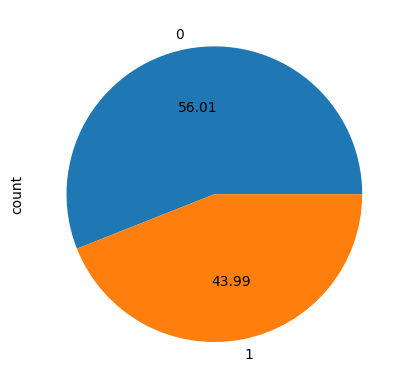

In [121]:
df1['accept(y/n?)'].value_counts().plot(kind='pie', autopct='%.2f')

nearly 44% people accepted the coupon and 56% didn't accepted

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='coffeehouse', ylabel='count'>

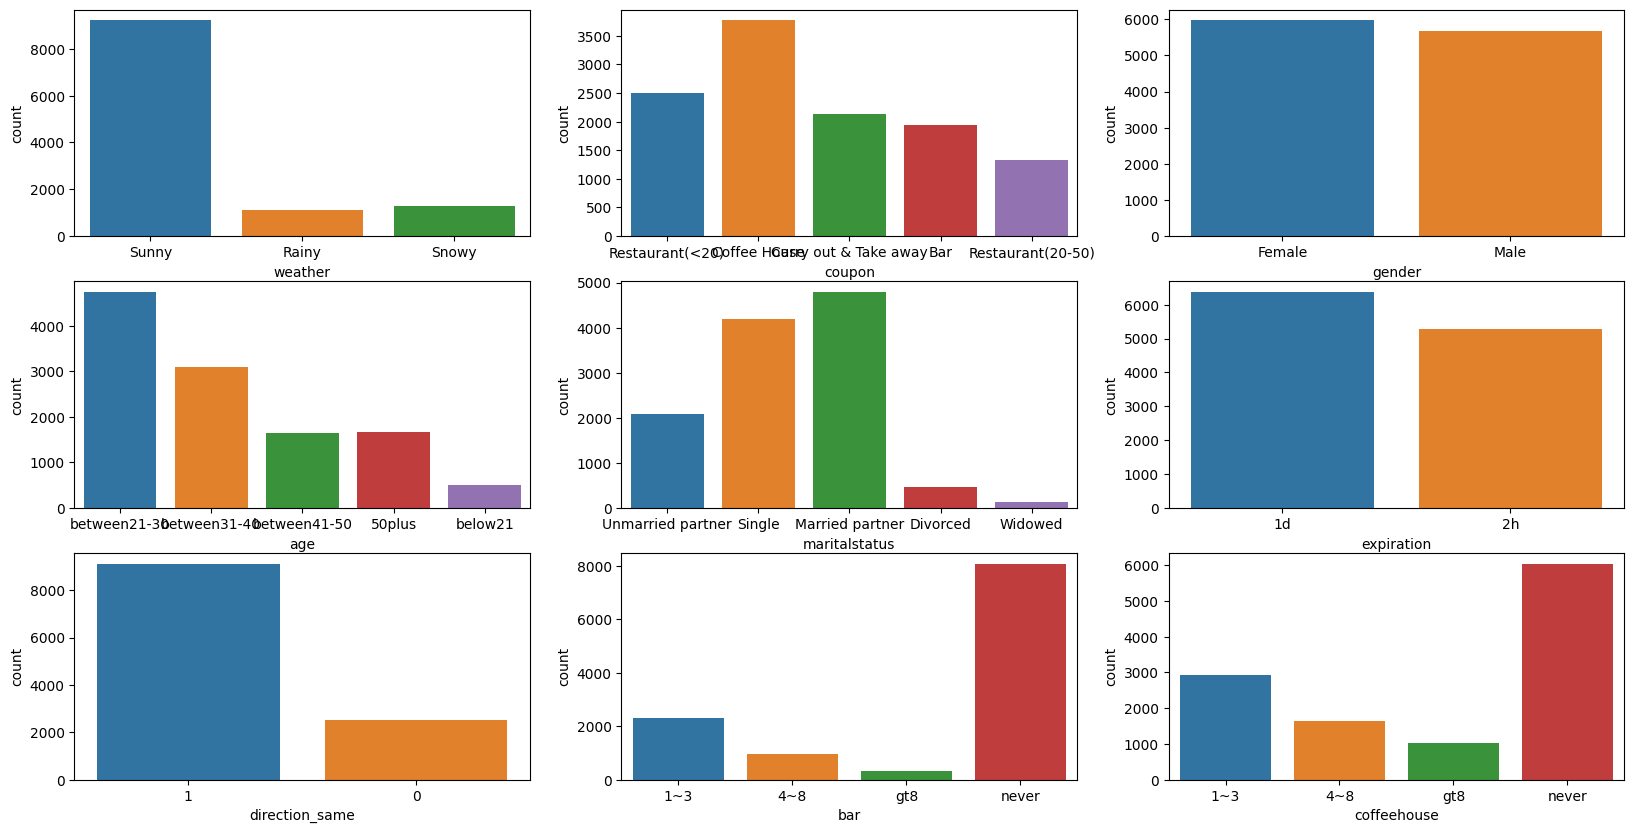

In [122]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
sns.countplot(x='weather',data=df1,ax=ax[0,0])
sns.countplot(x='coupon',data=df1,ax=ax[0,1])
sns.countplot(x='gender',data=df1,ax=ax[0,2])
sns.countplot(x='age',data=df1,ax=ax[1,0])
sns.countplot(x='maritalstatus',data=df1,ax=ax[1,1])
sns.countplot(x='expiration',data=df1,ax=ax[1,2])
sns.countplot(x='direction_same',data=df1,ax=ax[2,0])
sns.countplot(x='bar',data=df1,ax=ax[2,1])
sns.countplot(x='coffeehouse',data=df1,ax=ax[2,2])


/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='accept(y/n?)', ylabel='count'>

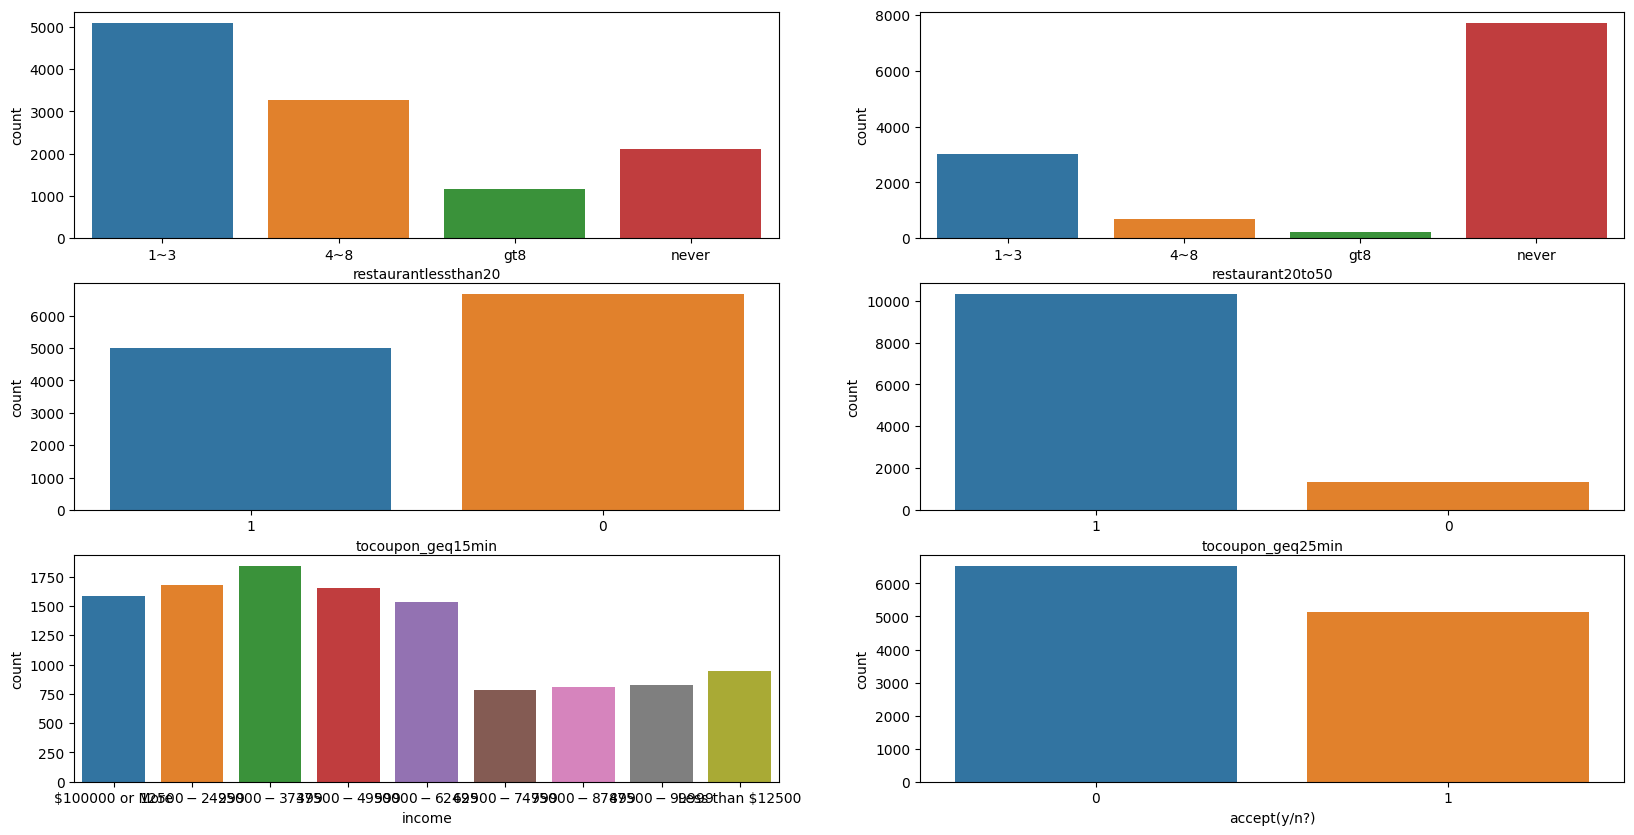

In [123]:
fig,ax=plt.subplots(3,2,figsize=(20,10))
sns.countplot(x='restaurantlessthan20',data=df1,ax=ax[0,0])
sns.countplot(x='restaurant20to50',data=df1,ax=ax[0,1])
sns.countplot(x='tocoupon_geq15min',data=df1,ax=ax[1,0])
sns.countplot(x='tocoupon_geq25min',data=df1,ax=ax[1,1])
sns.countplot(x='income',data=df1,ax=ax[2,0])
sns.countplot(x='accept(y/n?)',data=df1,ax=ax[2,1])

The number of males and females is almost equal, out of which majority of people have age between 21-30 years. Most of them are unemployers and students, most coupons are of coffeehouse and mostly the coupons have 1 day expiration. 

<Axes: ylabel='count'>

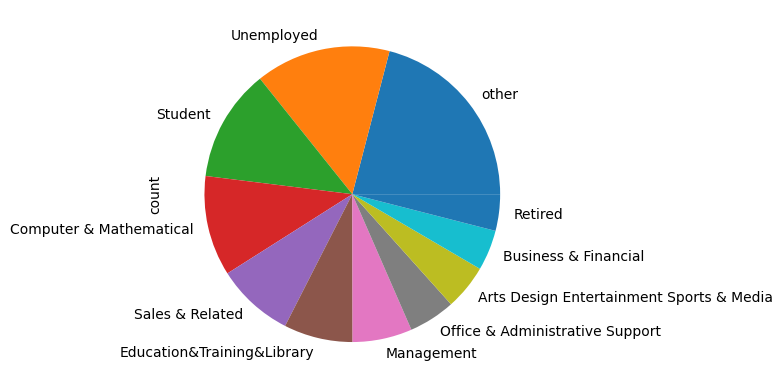

In [124]:
df1['occupation'].value_counts().plot(kind='pie')

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='carryaway', ylabel='count'>

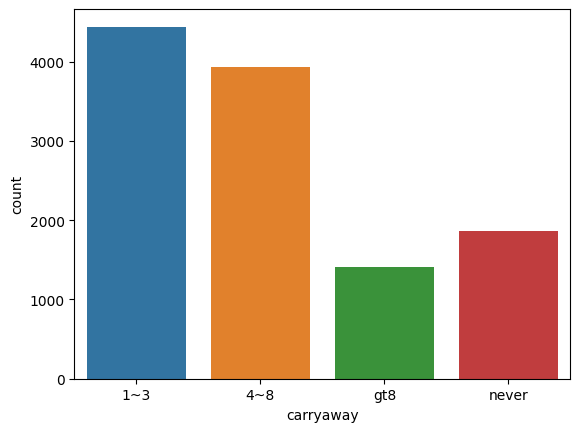

In [125]:
sns.countplot(x='carryaway',data=df1)

## Multivariate Analysis

### Gender and coupon acceptance

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

<Axes: xlabel='coffeehouse', ylabel='count'>

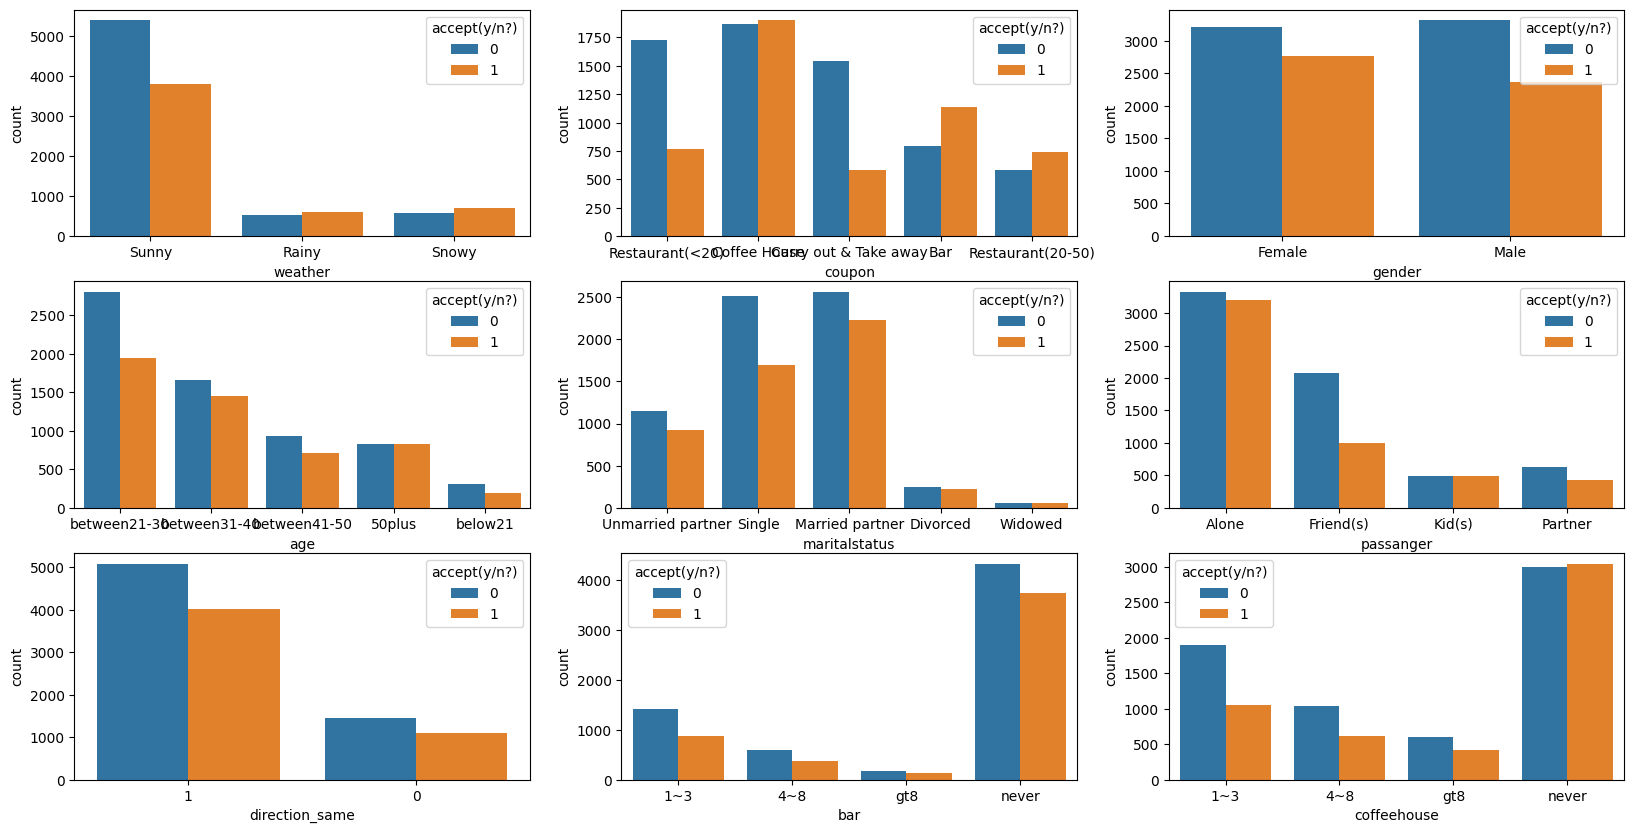

In [126]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
sns.countplot(x='weather',data=df1,hue='accept(y/n?)',ax=ax[0,0])
sns.countplot(x='coupon',data=df1,hue='accept(y/n?)',ax=ax[0,1])
sns.countplot(x='gender',data=df1,hue='accept(y/n?)',ax=ax[0,2])
sns.countplot(x='age',data=df1,hue='accept(y/n?)',ax=ax[1,0])
sns.countplot(x='maritalstatus',data=df1,hue='accept(y/n?)',ax=ax[1,1])
sns.countplot(x='passanger',data=df1,hue='accept(y/n?)',ax=ax[1,2])
sns.countplot(x='direction_same',data=df1,hue='accept(y/n?)',ax=ax[2,0])
sns.countplot(x='bar',data=df1,hue='accept(y/n?)',ax=ax[2,1])
sns.countplot(x='coffeehouse',data=df1,hue='accept(y/n?)',ax=ax[2,2])


/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:641: Fut

<Axes: xlabel='carryaway', ylabel='count'>

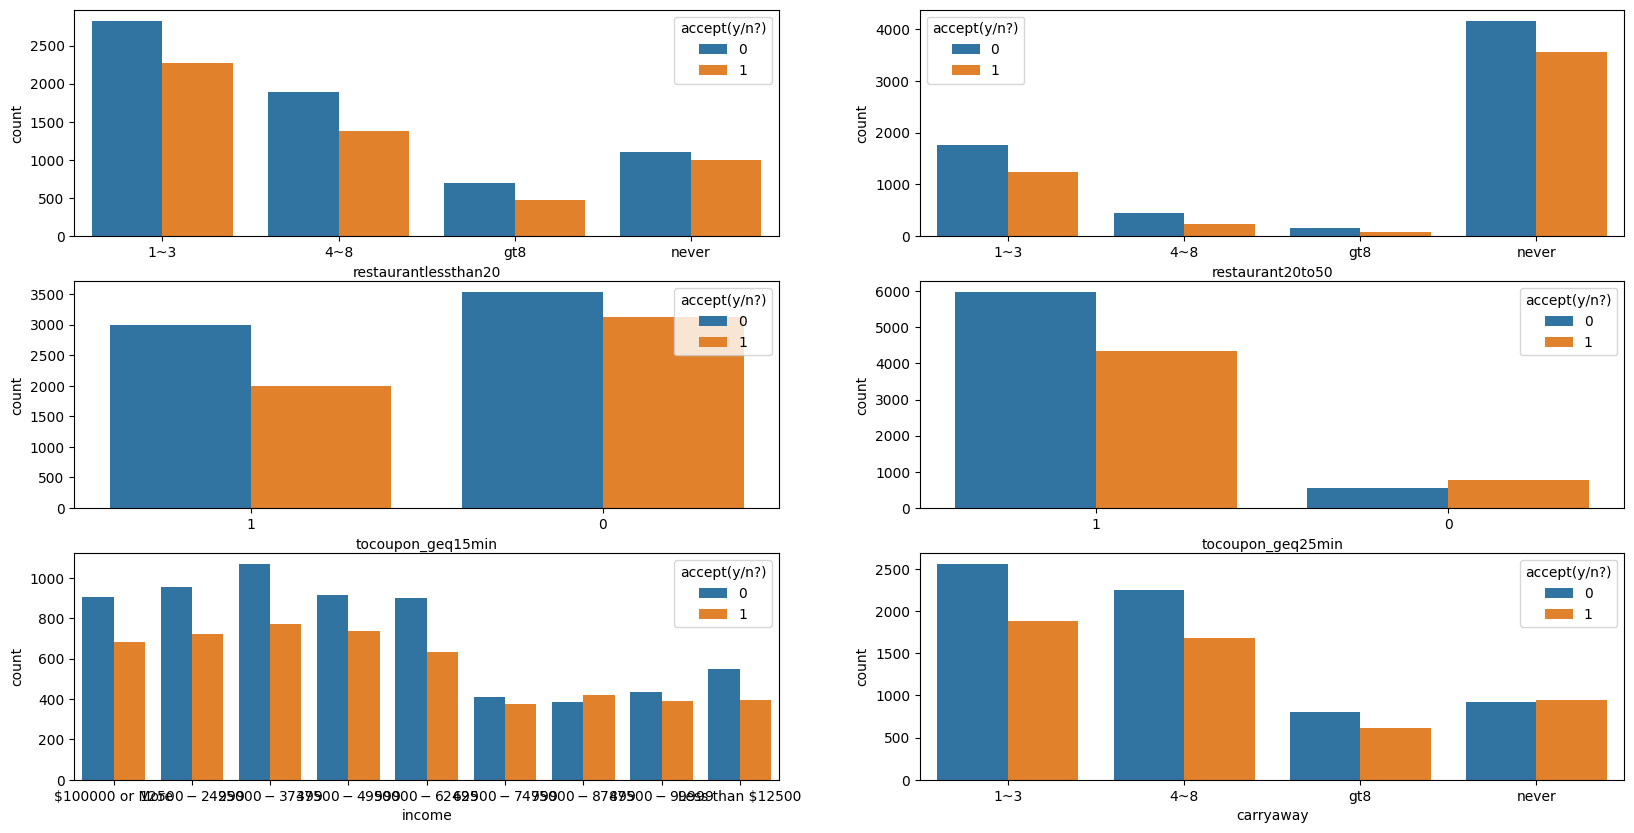

In [127]:
fig,ax=plt.subplots(3,2,figsize=(20,10))
sns.countplot(x='restaurantlessthan20',data=df1,hue='accept(y/n?)',ax=ax[0,0])
sns.countplot(x='restaurant20to50',data=df1,hue='accept(y/n?)',ax=ax[0,1])
sns.countplot(x='tocoupon_geq15min',data=df1,hue='accept(y/n?)',ax=ax[1,0])
sns.countplot(x='tocoupon_geq25min',data=df1,hue='accept(y/n?)',ax=ax[1,1])
sns.countplot(x='income',data=df1,hue='accept(y/n?)',ax=ax[2,0])
sns.countplot(x='carryaway',data=df1,hue='accept(y/n?)',ax=ax[2,1])

As the no.of males and females are nearly equal, females are accepting the coupons more compared to males.

In [128]:
df1['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [129]:
print("sunny:",(len(df1[(df1["weather"]=="Sunny") & (df1["accept(y/n?)"]=="1")])/(len(df1[df1["weather"]=="Sunny"])))*100)
print("Rainy:",(len(df1[(df1["weather"]=="Rainy") & (df1["accept(y/n?)"]=="1")])/(len(df1[df1["weather"]=="Rainy"])))*100)
print("Snowy:",(len(df1[(df1["weather"]=="Snowy") & (df1["accept(y/n?)"]=="1")])/(len(df1[df1["weather"]=="Snowy"])))*100)

sunny: 41.3882863340564
Rainy: 52.753108348134994
Snowy: 54.831288343558285


If the weather is Snowy then there is a 54% chance to accept the coupon

In [130]:
df1['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [131]:
print("C:",(len(df1[(df1["coupon"]=="Coffee House") & (df1["accept(y/n?)"]=="1")])/(len(df1[df1["coupon"]=="Coffee House"])))*100)
print("B:",(len(df1[(df1["coupon"]=="Bar") & (df1["accept(y/n?)"]=="1")])/(len(df1[df1["coupon"]=="Bar"])))*100)
print("R2050:",(len(df1[(df1["coupon"]=="Restaurant(20-50)") & (df1["accept(y/n?)"]=="1")])/(len(df1[df1["coupon"]=="Restaurant(20-50)"])))*100)

C: 50.41103155661628
B: 58.7170201758924
R2050: 55.84905660377358


If the coupon is Bar then there is a 58% chance to accept the coupon

In [132]:
print("FC:",(len(df1[(df1["coupon"]=="Coffee House") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["coupon"]=="Coffee House") & (df1["gender"]=="Female")])))*100)
print("FB:",(len(df1[(df1["coupon"]=="Bar") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["coupon"]=="Bar") & (df1["gender"]=="Female")])))*100)
print("FR25:",(len(df1[(df1["coupon"]=="Restaurant(20-50)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["coupon"]=="Restaurant(20-50)") & (df1["gender"]=="Female")])))*100)
print("FR2:",(len(df1[(df1["coupon"]=="Restaurant(<20)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["coupon"]=="Restaurant(<20)") & (df1["gender"]=="Female")])))*100)
print("FCT:",(len(df1[(df1["coupon"]=="Carry out & Take away") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["coupon"]=="Carry out & Take away") & (df1["gender"]=="Female")])))*100)


FC: 51.54162384378211
FB: 65.53446553446554
FR25: 56.948640483383684
FR2: 31.620553359683797
FCT: 29.2616226071103


Females are accepting more Bar coupons

In [133]:
print("MC:",(len(df1[(df1["coupon"]=="Coffee House") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["coupon"]=="Coffee House") & (df1["gender"]=="Male")])))*100)
print("MB:",(len(df1[(df1["coupon"]=="Bar") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["coupon"]=="Bar") & (df1["gender"]=="Male")])))*100)
print("MR25:",(len(df1[(df1["coupon"]=="Restaurant(20-50)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["coupon"]=="Restaurant(20-50)") & (df1["gender"]=="Male")])))*100)
print("MR2:",(len(df1[(df1["coupon"]=="Restaurant(<20)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["coupon"]=="Restaurant(<20)") & (df1["gender"]=="Male")])))*100)
print("MCT:",(len(df1[(df1["coupon"]=="Carry out & Take away") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["coupon"]=="Carry out & Take away") & (df1["gender"]=="Male")])))*100)


MC: 49.205479452054796
MB: 51.39484978540773
MR25: 54.75113122171946
MR2: 29.51219512195122
MCT: 25.75315840621963


Males are accepting more Restaurant(20-50)coupon 

In [134]:
df1.age.unique()

['between21-30', 'between41-50', 'between31-40', '50plus', 'below21']
Categories (5, object): ['between21-30', 'between31-40', 'between41-50', '50plus', 'below21']

In [135]:
print("FC:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Coffee House") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Coffee House") & (df1["gender"]=="Female")])))*100)
print("FB:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Bar") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Bar") & (df1["gender"]=="Female")])))*100)
print("FR25:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(20-50)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(20-50)") & (df1["gender"]=="Female")])))*100)
print("FR2:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(<20)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(<20)") & (df1["gender"]=="Female")])))*100)
print("FCT:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Carry out & Take away") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Female")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Carry out & Take away") & (df1["gender"]=="Female")])))*100)


FC: 51.724137931034484
FB: 56.75675675675676
FR25: 42.857142857142854
FR2: 23.404255319148938
FCT: 30.952380952380953


Females with age above20 are accepting more Bar coupons and next to them Restaurant(20-50) coupon and
Females with age below20 are accepting more Bar coupons and next to them Coffee House coupon

In [136]:
print("MC:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Coffee House") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Coffee House") & (df1["gender"]=="Male")])))*100)
print("MB:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Bar") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Bar") & (df1["gender"]=="Male")])))*100)
print("MR25:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(20-50)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(20-50)") & (df1["gender"]=="Male")])))*100)
print("MR2:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(<20)") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Restaurant(<20)") & (df1["gender"]=="Male")])))*100)
print("MCT:",(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Carry out & Take away") & (df1["accept(y/n?)"]=="1") & (df1["gender"]=="Male")])/(len(df1[(df1["age"]=="below21") & (df1["coupon"]=="Carry out & Take away") & (df1["gender"]=="Male")])))*100)


MC: 17.77777777777778
MB: 59.09090909090909
MR25: 66.66666666666666
MR2: 29.411764705882355
MCT: 32.142857142857146


Males of all age categories accepting more Restaurant(20-50) coupons and next to them Bar coupons 

In [137]:
print("15min:",(len(df1[(df1["tocoupon_geq15min"]=="1")])))
print("25min:",(len(df1[(df1["tocoupon_geq25min"]=="1")])))

15min: 4994
25min: 10311


In [138]:
print("15min:",(len(df1[(df1["tocoupon_geq15min"]=="1") & (df1["tocoupon_geq25min"]=="1")])))

15min: 4994


In [139]:
print("15min:",(len(df1[(df1["tocoupon_geq15min"]=="1")])/(len(df1['tocoupon_geq15min'])))*100)
print("25min:",(len(df1[(df1["tocoupon_geq25min"]=="1")])/(len(df1['tocoupon_geq25min'])))*100)

15min: 42.86695278969957
25min: 88.50643776824035


for most of the people to reach rest/cafe/bar it's taking >25min. 

# Data Preprocessing 

### Handling outliers

In the dataset there are no integer features, all are categorical features. so there is no need for analysing outliers.

### Splitting the dataset

In [140]:
df2=df1.copy

In [141]:
x=df1.drop(columns=['accept(y/n?)'])
y=df1['accept(y/n?)']

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

In [143]:
print(df1.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11650, 20)
(9320, 19)
(2330, 19)
(9320,)
(2330,)


## Encoding

In [144]:
from sklearn.compose import ColumnTransformer

In [145]:
x_train.columns

Index(['passanger', 'weather', 'coupon', 'expiration', 'gender', 'age',
       'maritalstatus', 'has_children', 'education', 'occupation', 'income',
       'bar', 'coffeehouse', 'carryaway', 'restaurantlessthan20',
       'restaurant20to50', 'tocoupon_geq15min', 'tocoupon_geq25min',
       'direction_same'],
      dtype='object')

In [146]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11650 entries, 0 to 12683
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   passanger             11650 non-null  object  
 1   weather               11650 non-null  object  
 2   coupon                11650 non-null  object  
 3   expiration            11650 non-null  object  
 4   gender                11650 non-null  object  
 5   age                   11650 non-null  category
 6   maritalstatus         11650 non-null  object  
 7   has_children          11650 non-null  object  
 8   education             11650 non-null  category
 9   occupation            11650 non-null  object  
 10  income                11650 non-null  category
 11  bar                   11650 non-null  category
 12  coffeehouse           11650 non-null  category
 13  carryaway             11650 non-null  category
 14  restaurantlessthan20  11650 non-null  category
 15  restaur

In [147]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [148]:
# Ordinalencoding 
oe = OrdinalEncoder()
x_train_ord = oe.fit_transform(x_train[['expiration','age','education','income','bar','coffeehouse','carryaway','restaurantlessthan20','restaurant20to50']])

# also the test data
x_test_ord = oe.fit_transform(x_test[['expiration','age','education','income','bar','coffeehouse','carryaway','restaurantlessthan20','restaurant20to50']])

x_train_ord.shape

(9320, 9)

In [149]:
# OneHotEncoding 
ohe = OneHotEncoder(drop='first',sparse=False)
x_train_nom = ohe.fit_transform(x_train[['passanger','weather','coupon','gender','maritalstatus','has_children','occupation','tocoupon_geq15min','tocoupon_geq25min','direction_same']])

# also the test data
x_test_nom = ohe.fit_transform(x_test[['passanger','weather','coupon','gender','maritalstatus','has_children','occupation','tocoupon_geq15min','tocoupon_geq25min','direction_same']])

x_train_nom.shape

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(9320, 28)

In [150]:
x_train_transformed = np.concatenate((x_train_ord,x_train_nom),axis=1)
# also the test data
x_test_transformed = np.concatenate((x_test_ord,x_test_nom),axis=1)

x_train_transformed.shape

(9320, 37)

In [151]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [152]:
le.fit(y_train)

LabelEncoder()

In [153]:
le.classes_

array(['0', '1'], dtype=object)

In [154]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [155]:
y_train.shape

(9320,)

# Machine Learning Models

## DecisionTree

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [157]:
import time
import random
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [158]:
# DecisionTree
model_dt = DecisionTreeClassifier(random_state=1, max_depth=8,min_samples_split=2,min_samples_leaf=6,criterion='entropy')
model_dt.fit(x_train_transformed, y_train)
model_dt_score_train = model_dt.score(x_train_transformed, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test_transformed, y_test)
print("Testing score: ",model_dt_score_test)


Training score:  0.7137339055793992
Testing score:  0.6742489270386266


In [159]:
#gridsearchcv
start = time.time()

param_dist = {'max_depth': [7,8,9,10],
              'min_samples_split': [1,2,3],
              'min_samples_leaf':[5,6,7,8,9],
              
              'criterion': ['gini','entropy']
              }

cv_rf = GridSearchCV(model_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train_transformed, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2}
Time taken in grid search:  6.76


/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_pa

In [160]:
#performance metrics

y_pred_dt=model_dt.predict(x_test_transformed)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
print("AUC:",roc_auc_dt)

AUC: 0.670103882115051


In [161]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dt))
print("Recall:",metrics.recall_score(y_test,y_pred_dt))
print("Precision:",metrics.precision_score(y_test,y_pred_dt))

Accuracy: 0.6742489270386266
Recall: 0.6345966958211856
Precision: 0.6303088803088803


In [162]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_dt))  
print(classification_report(y_test, y_pred_dt)) 

              

[[918 383]
 [376 653]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1301
           1       0.63      0.63      0.63      1029

    accuracy                           0.67      2330
   macro avg       0.67      0.67      0.67      2330
weighted avg       0.67      0.67      0.67      2330



## Random Forest

In [163]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [164]:
fit_rf = RandomForestClassifier(random_state=42)

In [165]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [12,13,14,15],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
              }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train_transformed, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_par

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2'}
Time taken in grid search:  223.84


In [166]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  max_depth = 14)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       random_state=42)

In [167]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train_transformed, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/

In [168]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

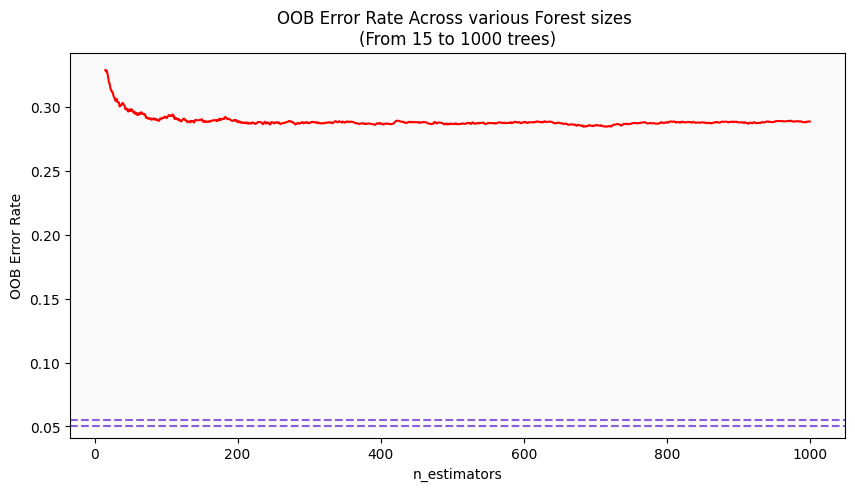

In [169]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [170]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=180,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       n_estimators=180, random_state=42)

In [171]:
fit_rf.fit(x_train_transformed,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features='log2',
                       n_estimators=180, random_state=42)

In [172]:
predictions_rf = fit_rf.predict(x_test_transformed)

In [173]:
#performance metrics


fpr_rf, tpr_rf, _ = roc_curve(y_test, predictions_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("AUC:",roc_auc_rf)


AUC: 0.6970637821396264


In [174]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,predictions_rf))
print("Recall:",metrics.recall_score(y_test,predictions_rf))
print("Precision:",metrics.precision_score(y_test,predictions_rf))

Accuracy: 0.7051502145922747
Recall: 0.6277939747327502
Precision: 0.68


In [176]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, predictions_rf))  
print(classification_report(y_test, predictions_rf)) 



[[997 304]
 [383 646]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1301
           1       0.68      0.63      0.65      1029

    accuracy                           0.71      2330
   macro avg       0.70      0.70      0.70      2330
weighted avg       0.70      0.71      0.70      2330



# KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=59,metric='manhattan')  
classifier.fit(x_train_transformed,y_train)  

KNeighborsClassifier(metric='manhattan', n_neighbors=59)

In [178]:
 knn = KNeighborsClassifier()

np.random.seed(42)
start = time.time()

param_dist = {'n_neighbors':[56,57,59,60],
             'metric':['eucleadian','manhattan']}
              

cv_rf = GridSearchCV( knn, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train_transformed, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'metric': 'manhattan', 'n_neighbors': 59}
Time taken in grid search:  3.60


/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parame

In [179]:
y_pred = classifier.predict(x_test_transformed)  

In [180]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 



[[1004  297]
 [ 498  531]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1301
           1       0.64      0.52      0.57      1029

    accuracy                           0.66      2330
   macro avg       0.65      0.64      0.64      2330
weighted avg       0.66      0.66      0.65      2330



# LogisticRegression

In [181]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train_transformed,y_train)

/Users/sp953694/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [182]:
y_pred=logreg.predict(x_test_transformed)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[969 332]
 [420 609]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1301
           1       0.65      0.59      0.62      1029

    accuracy                           0.68      2330
   macro avg       0.67      0.67      0.67      2330
weighted avg       0.68      0.68      0.68      2330

